# Обработка и анализ текстовых данных

________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 1. Парсинг данных

In [55]:
# Импортиурем билиотеку для запросов
import requests
# Импортируем модуль для парсинга
from bs4 import BeautifulSoup
# Импортируем библиотеку для работы с данными
import pandas as pd

# Функция для парсинга статей с главной страницы
def get_article_links(base_url):
    # Подаем запрос по ссылке
    response = requests.get(base_url)
    # Проверяем на ошибки
    if response.status_code != 200:
        print(f"Ошибка при получении главной страницы: {response.status_code}")
        # Вовзращаем пустой массив
        return []
    
    # Создаем объект парсера
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Создаем массив для хранения ссылок
    links = []
    
    # Циклом проходимся по всем тегам a со страницы
    for link in soup.find_all('a', href=True):
        # В переменную сохраняем href из тега а
        href = link['href']
        # Проверяем условие, что в href присутствует необходимый элемент ссылки
        if '/news/neftegazodobycha/' in href or '/news/neftepererabotka/' in href:
            # Из полученного href берем последний элемент
            last_obj_url = href.split('/')[-2]
            # Создаем полную ссылку
            full_url = base_url + last_obj_url  + '/'
            # Добавляем ссылку в массив
            links.append(full_url)
    
    # Если ни одной ссылки не найдено, то выводим ошибку
    if not links:
        print("Не удалось найти ссылки на статьи. Проверьте структуру HTML.")
    
    # Возвращаем полученный массив
    return links

# Функция для парсинга текста из статьи
def parse_article(url):
    # Подаем запрос по ссылке
    response = requests.get(url)
    # Проверяем на ошибки
    if response.status_code != 200:
        print(f"Ошибка при получении статьи по адресу {url}: {response.status_code}")
        # Возвращаем None
        return None
    
    # Создаем объект парсера
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Находим содержимое статьи
    content_div = soup.find('div', class_='news-page news-page-content')
    # Выводим ошибку, если не нашлось контента
    if not content_div:
        print(f"Не удалось найти содержимое статьи по адресу {url}")
        # Вовзращаем None
        return None
    
    # Достаем из полученного контента текст
    content = content_div.get_text(separator='\n').strip()
    
    # Возвращаем полученный текст
    return {
        'content': content
    }

# Основная функция для парсинга статей
def main():
    # Доп ссылка для парсинга: 
    also_url = "https://sectormedia.ru/news/neftepererabotka/"
    # Сохраняем основную ссылку
    base_url = "https://sectormedia.ru/news/neftegazodobycha/"
    # Получаем ссылки статей
    article_links = get_article_links(base_url)
    # Выводим ошибку, если статьи не найдены
    if not article_links:
        print("Не удалось найти ссылки на статьи.")
        # Возвращаем None
        return None
    
    # Создаем массив для статей
    articles = []
    # Проходимся циклом по каждый статье
    for link in article_links:
        # Указываем какую статью парсим
        print(f"Парсинг статьи по адресу: {link}")
        # Парсим статью
        article = parse_article(link)
        # Если стья есть, то добавляем ее в массив
        if article:
            articles.append(article)
    
    # Выводим ошибку, если массив со статьями пустой
    if not articles:
        print("Не удалось получить статьи.")
        # Возвращаем None
        return None
    
    # Создание DataFrame для сохранения результатов
    df = pd.DataFrame(articles)
    # Сохраняем DataFrame в формате csv
    df.to_csv('articles.csv', index=False, encoding='utf-8')
    # Выводим сообще об успешном окончание работы скрипта
    print("Сохранено в articles.csv")

# Запуск основной функции
if __name__ == "__main__":
    main()


Парсинг статьи по адресу: https://sectormedia.ru/news/neftepererabotka/proizvodstvo-benzina-v-rossii-otstaet-ot-plana/
Парсинг статьи по адресу: https://sectormedia.ru/news/neftepererabotka/proizvodstvo-benzina-v-rossii-otstaet-ot-plana/
Парсинг статьи по адресу: https://sectormedia.ru/news/neftepererabotka/neftepererabotka/
Ошибка при получении статьи по адресу https://sectormedia.ru/news/neftepererabotka/neftepererabotka/: 404
Парсинг статьи по адресу: https://sectormedia.ru/news/neftepererabotka/novatek-planiruet-zapustit-spg-proekty-vo-vetname/
Парсинг статьи по адресу: https://sectormedia.ru/news/neftepererabotka/novatek-planiruet-zapustit-spg-proekty-vo-vetname/
Парсинг статьи по адресу: https://sectormedia.ru/news/neftepererabotka/neftepererabotka/
Ошибка при получении статьи по адресу https://sectormedia.ru/news/neftepererabotka/neftepererabotka/: 404
Парсинг статьи по адресу: https://sectormedia.ru/news/neftepererabotka/globalnoe-proizvodstvo-etilena-mozhet-rezko-sokratitsya/


In [56]:
# Открываем файл для добавления
with open('articles.csv', 'a') as f1:
    # Открываем файл для чтения
    with open('articles_1.csv', 'r') as f2:
        # Циклом проходимся по всем строчкам файла
        for row in f2:
            # Добаввляем строчку в основной файл
            f1.write(row)


________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 2. Предобработка данных

In [57]:
# Импортиурем библиотеку для работы со строками
import re
# Импортируем билиотеку для работы с текстом 
import nltk
# импортируем моудль для удаления стоп слов
from nltk.corpus import stopwords
# импортируем библиотеку для лемматизации слов
import spacy

# Загружаем предобученную модель для лемматизации слов
nlp = spacy.load('ru_core_news_sm')
# Загружаем стоп слова
nltk.download('stopwords')
# Сохраняем стоп слова в переменную
stop_words = stopwords.words('russian')

# Функция предобработки текста
def clean_and_lemmatize_text(text):
    # Удаление знаков припинания
    text = re.sub(r'[^\w\s]', '', text)
    # Удаление цифр
    text = re.sub(r'[0-9]', '', text)
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text)
    # Приведение к нижнему регистру
    text = text.lower()
    # Лемматизация слов
    lemmatized_words = nlp(text)
    # Преобразование токенов в слова и сохранение текста
    clean_text = ' '.join(token.lemma_ for token in lemmatized_words if token not in stop_words)

    # Возвращаем очищенный текст
    return clean_text


# Создаем массив для хранения текста
input_text = []
# Открытие файла для четния
with open('articles.csv', 'r') as f:
    # Проходимся циклом по каждой строке файла
    for row in f:
        # Добавляем строку в массив
        input_text.append(row.rstrip('\n'))
# Сохраняем в переменной очищенный текст
cleaned_text = clean_and_lemmatize_text(' '.join(input_text))
# Вывод
print('Очищенный и лемматизированный текст:')
# Выводим очищенный текст
print(cleaned_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Очищенный и лемматизированный текст:
content группа компания грант с год являться ведущий разработчик и производитель контрольноизмерительных прибор и лабораторный аппарат система автоматизация для нефтегазовый предприятие прибор и система создать гк грант успешно эксплуатироваться более чем в объединение предприятие исследовательский институт вуз россия и страна ближний зарубежье среди постоянный партнёр компания оао газпром оао анк башнефть оао татнефть оао сургутнефтегаз оао нк роснефть мнп ооо геодата шлюмберже и другие прибор датчик система контроль и автоматизация произвести гк грант позволять проводить измерение осуществлять постоянный контроль работа узел и механизм помогать обеспечить надёжность и безопасность эксплуатация оборудование нефтегазодобывающий предприятие гк грант предлагать новинка год скважинный глубинный оборудование пробоотборники глубинные гк грант предлагать новый исполнение пробоотборник пробоотборник глубинный проточный автономный пгпамт и пробоотборник глу

________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 3. Создание числовых признаков

- 3.1 Находим количество слов

In [58]:
# Выводим количество слов
print('Количество слов:', len(cleaned_text.split()))

Количество слов: 11894


- 3.2 Находим количество символов

In [59]:
# Создаем переменную для хранения количества символов
count_chars = 0
# Циклом проходимся по всем словам
for word in cleaned_text.split():
    # Добавляем к переменной длинну слова
    count_chars += len(word)
# Выводим количество символов
print('Количество символов:', count_chars)

Количество символов: 75410


- 3.3 Находим среднюю длинну слов

In [60]:
# Выводим среднюю длинну слов
print('Средняя длинна слов:', count_chars / len(cleaned_text.split()))

Средняя длинна слов: 6.3401715150496045


- 3.4 Находим заспамленность

In [61]:
# Из билиотеки импортируем модуль для счетчика
from collections import Counter

# Создаем функцию для подсчета заспамленности
def calculate_spam_score(text):
    # Подсчет частоты слов
    word_counts = Counter(text)
    
    # Считаем суммарное кол-во слов
    total_count = sum(word_counts.values())
    # Считаем уровень заспамленности
    spam_score = 1 - (len(word_counts) / total_count)
    
    # Возвращаем уровень заспамленности
    return spam_score

# Сохраняем в переменную ответ из созданной функции
score = calculate_spam_score(cleaned_text.split())
# Выводим уровень заспамленности
print(f"Заспамленность текста: {score}")


Заспамленность текста: 0.8565663359677148


________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 4. Классификация и кластеризация признаков

- 4.1 Классификация признаков

In [63]:
# Из библиотеки импортируем модули для токенайзера и предобученной модели
from transformers import BertTokenizer, BertModel
# Из библиотеки импортиурем модуль для логистической регрессии
from sklearn.linear_model import LogisticRegression
# Импортируем модуль для работы с нейросетями
import torch

# Сохраняем в переменную название модели
model_name = 'bert-base-uncased'
# Сохраняем в переменную предобученный токенайзер
tokenizer = BertTokenizer.from_pretrained(model_name)
# Сохраняем в переменную предобученную модель
model = BertModel.from_pretrained(model_name)

# Обучающие признаки, которые нужно искать
oil_gas_related = ["нефть", "газ", "добыча", "скважина", "метан", "трубопровод"]
# Инные обучающие признаки
other_related = ["вода", "экология", "здоровье", "животные", "растения"]

# Список всех слов
words = oil_gas_related + other_related
# Разметка слов
labels = [1] * len(oil_gas_related) + [0] * len(other_related)

# Функция для получения векторных представлений слов с помощью BERT
def get_word_embeddings(words):
    # В переменную сохраняем токены
    tokenized = tokenizer(words, padding=True, truncation=True, return_tensors='pt')
    # Запрещаем torch использовать градиентный спуск
    with torch.no_grad():
        # Получаем выход модели
        outputs = model(**tokenized)
        # Получаем эмбеддиннги слов
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # Представление всего ввода
    # Возвращаем эмбеддинги
    return embeddings

# Получение векторных представлений для слов
word_embeddings = get_word_embeddings(words)

# Сохраняем в переменную логистическую регрессию
classifier = LogisticRegression(random_state=42)
# Обучаем алгоритм
classifier.fit(word_embeddings, labels)

# Сохраняем в переменную слова для классификации
words_to_check = cleaned_text.split()

# Создаем массив для классификации слов
related_words = []
# Циклом проходимся по всем словам
for word in words_to_check:
    # Преобразование слова в векторное представление с использованием BERT
    word_embedding = get_word_embeddings([word])[0]
    # Предсказание класса слова
    prediction = classifier.predict([word_embedding])[0]
    # Если класс нужный нам и длинна слова больше 2-х, то добавляем слово в массив
    if prediction == 1 and len(word) > 2:
        related_words.append(word)

# Вывод результатов
print("Слова, связанные с добычей ресурсов:", related_words)

c:\Users\aleks\anaconda3\envs\gasnoil\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


- 4.2 Кластеризация признаков

c:\Users\aleks\anaconda3\envs\gasnoil\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


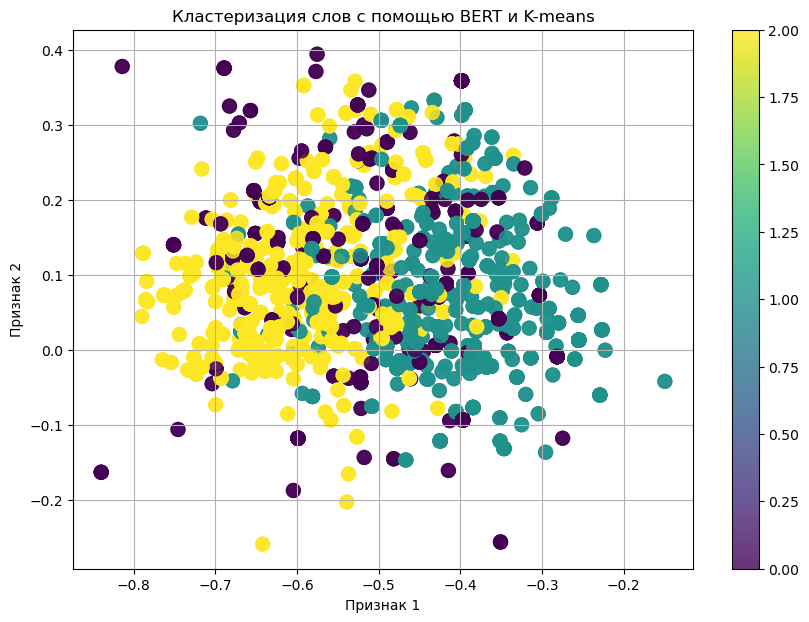

Кластер 0: ['год', 'вуз', 'ближний', 'среди', 'партнёр', 'оао', 'оао', 'анк', 'оао', 'оао', 'оао', 'узел', 'год', 'пгпамт', 'пгвам', 'данного', 'вид', 'ресурс', 'клапан', 'или', 'пгва', 'пгва', 'рда', 'сосуд', 'параметр', 'один', 'контейнер', 'грп', 'контейнер', 'нкт', 'контейнер', 'при', 'нет', 'амтк', 'диаметр', 'амтк', 'контейнер', 'гнкт', 'мту', 'манометртермометр', 'вид', 'радиоканал', 'тип', 'радиоканал', 'индикатор', 'аткт', 'тосолов', 'параметр', 'кристалл', 'при', 'кристалл', 'под', 'весь', 'год', 'вуз', 'ближний', 'среди', 'партнёр', 'оао', 'оао', 'анк', 'оао', 'оао', 'оао', 'узел', 'год', 'пгпамт', 'пгвам', 'данного', 'вид', 'ресурс', 'клапан', 'или', 'пгва', 'пгва', 'рда', 'сосуд', 'параметр', 'один', 'контейнер', 'грп', 'контейнер', 'нкт', 'контейнер', 'при', 'нет', 'амтк', 'диаметр', 'амтк', 'контейнер', 'гнкт', 'мту', 'манометртермометр', 'вид', 'радиоканал', 'тип', 'радиоканал', 'индикатор', 'аткт', 'тосолов', 'параметр', 'кристалл', 'при', 'кристалл', 'под', 'весь', 'б

In [ ]:
# Из библиотеки импортируем модуль для кластеризации
from sklearn.cluster import KMeans
# Импортируем модуль для построения графов
import matplotlib.pyplot as plt

# Сохраняем в переменную слова для векторизации
words = related_words
# Загружаем предобученный токенайзер для модели BERT
tokenizer = BertTokenizer.from_pretrained(model_name)
# Загружаем предобученную модель BERT
model = BertModel.from_pretrained(model_name)

# Токенизация и кодирование слов
encoded_input = tokenizer(words, return_tensors='pt', padding=True, truncation=True)

# Запрещаем torch использовать градиентный спуск
with torch.no_grad():
    # Получаем выход модели
    outputs = model(**encoded_input)

# Получаем векторные представления слов
word_embeddings = outputs.last_hidden_state[:, 0, :].numpy()

# Сохраняем кластеризатор в переменную
kmeans = KMeans(n_clusters=2, random_state=42)
# Обучаем кластеризатор
clusters = kmeans.fit_predict(word_embeddings)

# Задаем размер графику
plt.figure(figsize=(10, 7))
# Создаем график рассеивания
plt.scatter(word_embeddings[:, 0], word_embeddings[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.8)
# Задаем название графика
plt.title('Кластеризация слов с помощью BERT и K-means')
# Задаем название X
plt.xlabel('Признак 1')
# Задаем название Y
plt.ylabel('Признак 2')
# Включаем сетку графику
plt.grid(True)
# Показываем график
plt.show()

# Создаем словарь для хранения слов
clusters_dict = {}
# Циклом проходимся по всем кластерам
for cluster_num in set(clusters):
    # Сохраняем к каждому кластеры свои слова
    clusters_dict[cluster_num] = [words[i] for i in range(len(words)) if clusters[i] == cluster_num]

# Циклом проходимся по всем элементам кластеров
for cluster_num, words_in_cluster in clusters_dict.items():
    # Выводим номер кластера и его объекты
    print(f"Кластер {cluster_num}: {words_in_cluster}")


________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 5. Построение графиков и таблицы

- 5.1 Построение таблицы

In [16]:
# Импортируем из библиотеки модуль для счетчика
from collections import Counter
# Из библиотеки импортируем модуль для работы со страницами Excel
from openpyxl import Workbook

# Сохраняем в переменную слова для заполнения таблицы
words = related_words

# Подсчет встречаемости слов
word_counts = Counter(words)

# В переменную сохраняем объект нового листа
wb = Workbook()
# Сохраняем в переменную активный лист
ws = wb.active
# Задаем название активному листу
ws.title = "Words Count"

# Заполнение заголовков таблицы
ws.append(["Word", "Count"])

# Циклом проходимся по всем словам и их количеству
for word, count in word_counts.items():
    # Заполняем таблицу Excel данными
    ws.append([word, count])

# Сохранение Excel файла
wb.save("words_count.xlsx")

# Вывод об успешном завершение скрипта
print("Таблица создана и сохранена в words_count.xlsx") 

Таблица создана и сохранена в words_count.xlsx


- 5.2 Построение гистограммы

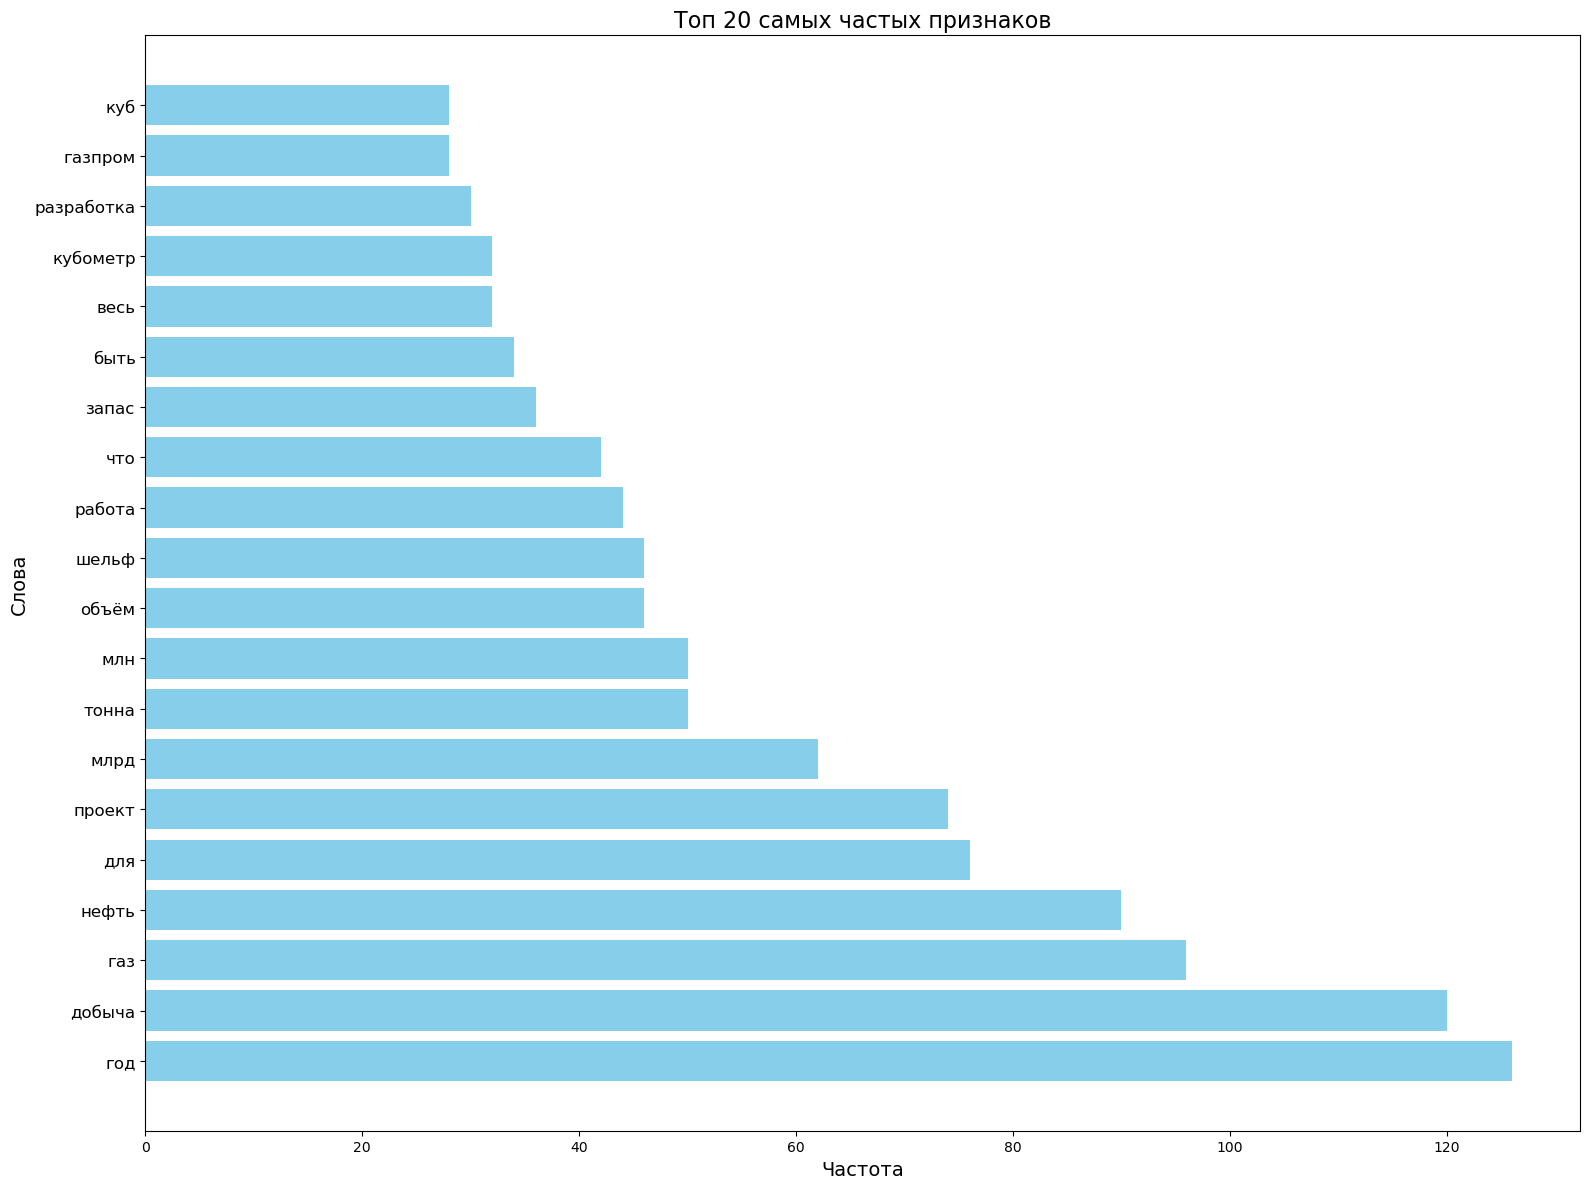

In [17]:
# Задаем количество слов
N = 20
# Сохраняем в переменную топ N слов по счетчику
most_common_words = word_counts.most_common(N)

# Подготовка данных для построения гистограммы
labels, values = zip(*most_common_words)

# Задаем размер гистограме
plt.figure(figsize=(16, 12))
# Настраием диаграмму
bars = plt.barh(labels, values, color='skyblue')
# Задаем название X
plt.xlabel('Частота', fontsize=14)
# Задаем название Y
plt.ylabel('Слова', fontsize=14)
# Задаем заголовок гистограме
plt.title(f'Топ {N} самых частых признаков', fontsize=16)
# Задаем размер меток по Y
plt.yticks(fontsize=12)  

# Устанавливаем более плотное расположение
plt.tight_layout()

# Сохранение гистограммы в файл
plt.savefig('columns_diagram.png')

# Отображение гистограммы
plt.show()

- 5.3 Построение диаграммы

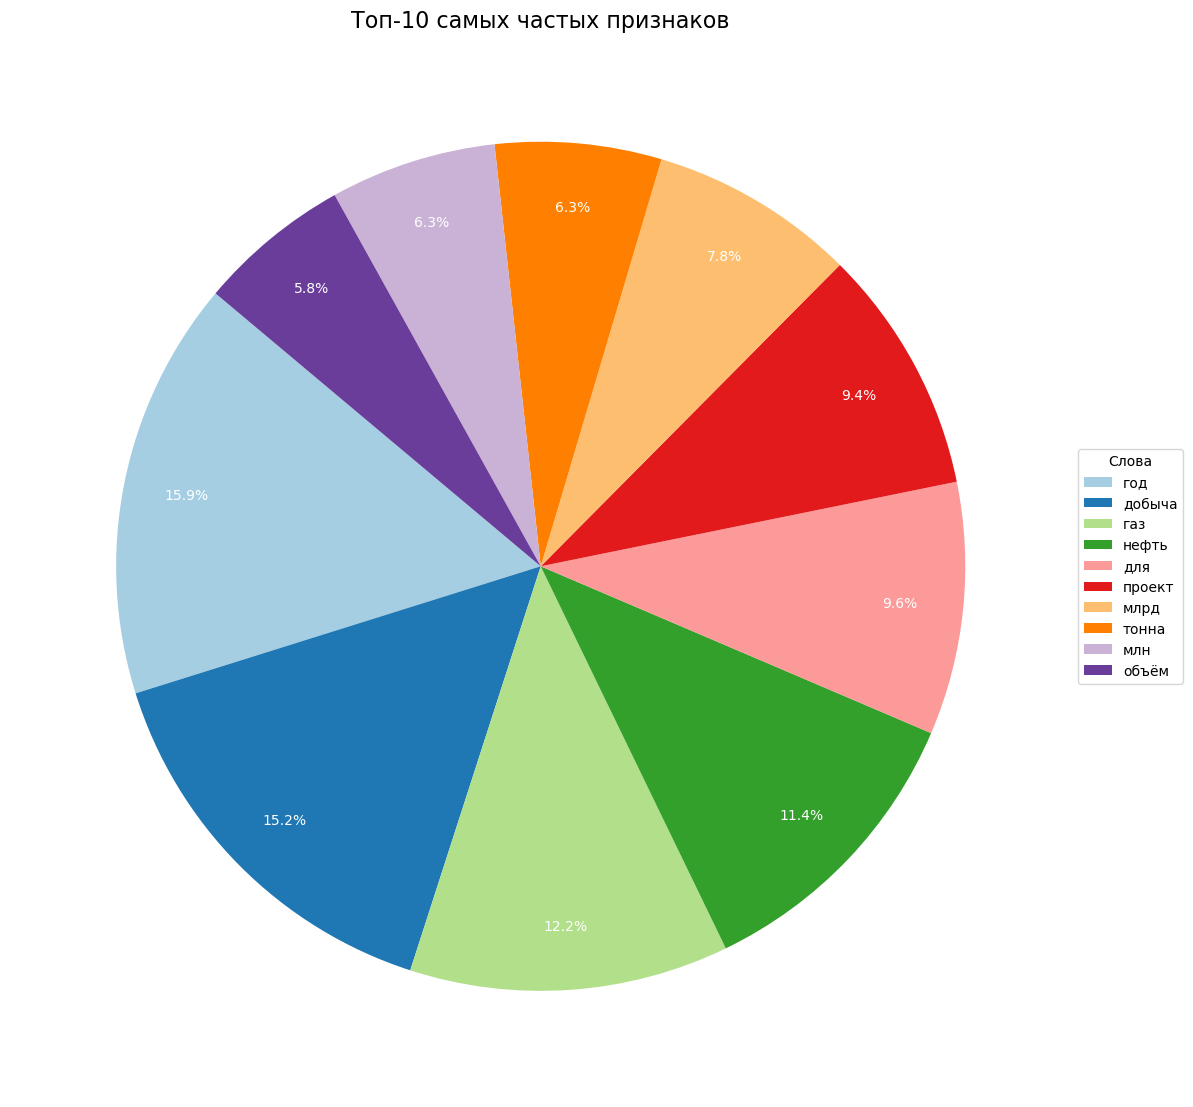

In [18]:
# Задаем количество слов
N = 10
# Сохраняем в переменную топ N слов по счетчику
most_common_words = word_counts.most_common(N)

# Подготовка данных для построения гистограммы
labels, values = zip(*most_common_words)


# Построение круговой диаграммы
plt.figure(figsize=(12, 12))
# Настройка круговой диаграммы
wedges, texts, autotexts = plt.pie(
    values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors,
    textprops=dict(color="w"), pctdistance=0.85
)

# Циклом проходимся по всем меткам
for text in texts:
    # Задаем размер метке
    text.set_fontsize(14)

# Добавление легенды
plt.legend(wedges, labels, title="Слова", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Задаем заголовок диаграммы
plt.title(f'Топ-{N} самых частых признаков', fontsize=16)

# Устанавливаем более плотное расположение
plt.tight_layout()

# Сохранение диаграмму в файл
plt.savefig('circle_diagram.png')

# Отображение диаграммы
plt.show()

________________________________________________________________________________________________________________________________________________________________________________________________________________________